In [1]:
import geopandas as gpd

In [42]:
# Read the shapefiles
shapefile1 = gpd.read_file("2.- Final_Outputs/Sofia_Shapefiles/EnschedeSofiaModel/Inner_Planes_EnshedeSofModel.shp")
shapefile2 = gpd.read_file("2.- Final_Outputs/Sofia_Shapefiles/Shapefiles_polygons_GT/Sofia_Planes_GT.shp")

In [43]:
# Perform spatial intersection
intersection = gpd.overlay(shapefile1, shapefile2, how='intersection')

# Calculate intersection area
intersection_area = intersection.area.sum()

# Calculate individual polygon areas
area1 = shapefile1.area.sum()
area2 = shapefile2.area.sum()

# Calculate Union area
union_area = area1 + area2 - intersection_area

In [44]:
# Calculate IoU
iou = intersection_area / union_area

print("Intersection over Union (IoU):", iou)

Intersection over Union (IoU): 0.7142731575003477


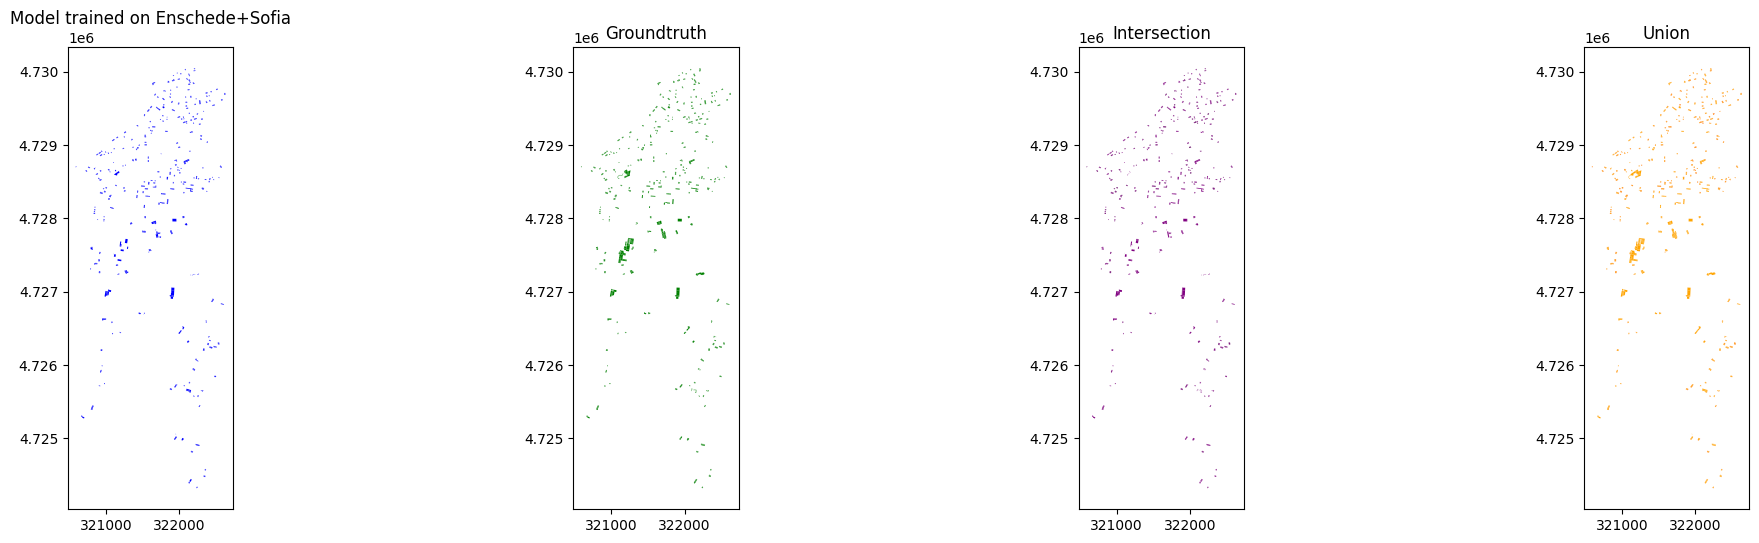

In [46]:
import matplotlib.pyplot as plt

# Perform spatial intersection and union
intersection = gpd.overlay(shapefile1, shapefile2, how='intersection')
union = gpd.overlay(shapefile1, shapefile2, how='union')

# Plot the original shapefiles, their intersection, and their union
fig, axs = plt.subplots(1, 4, figsize=(25, 6))

shapefile1.plot(ax=axs[0], color='blue')
axs[0].set_title('Model trained on Enschede+Sofia')

shapefile2.plot(ax=axs[1], color='green')
axs[1].set_title('Groundtruth')

intersection.plot(ax=axs[2], color='purple')
axs[2].set_title('Intersection')

union.plot(ax=axs[3], color='orange')
axs[3].set_title('Union')

plt.show()


In [10]:
# Create a new GeoDataFrame for the union of the two shapefiles
union_gdf = gpd.overlay(shapefile1, shapefile2, how='union')

# Assign the computed union_area to the new GeoDataFrame
union_gdf['union_area'] = union_area

<AxesSubplot: >

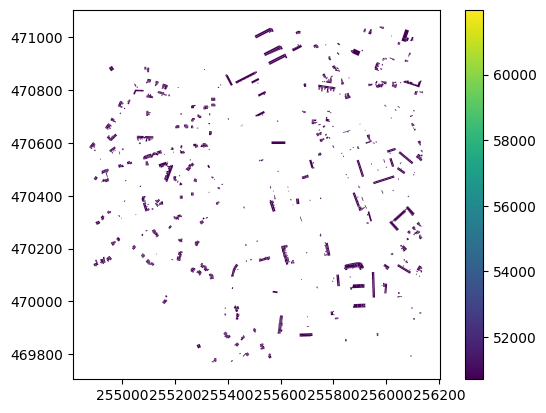

In [14]:
# Plot the new GeoDataFrame
union_gdf.plot(column='union_area', legend=True)

<AxesSubplot: >

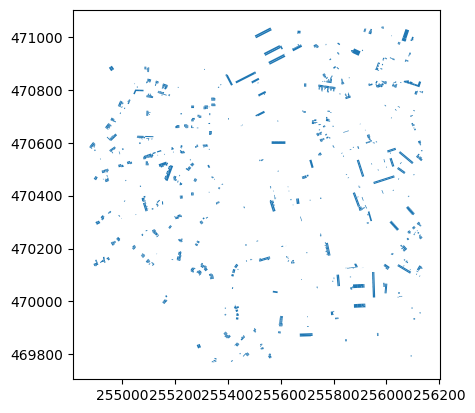

In [5]:
intersection.plot()

<AxesSubplot: >

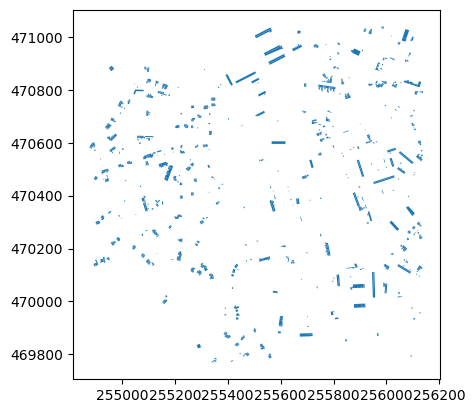

In [7]:
shapefile1.plot()

<AxesSubplot: >

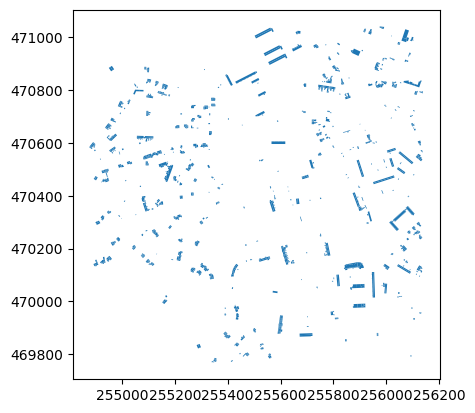

In [8]:
shapefile2.plot()

In [9]:
union_area.plot()

AttributeError: 'numpy.float64' object has no attribute 'plot'